In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
#import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into dependent and independent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [ ]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [ ]:
## concatenate these variables with dataframe
X = X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X = pd.concat([X, geography, gender], axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
## splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# StandardScalar is used for ANN for calculating Z value
# Also We can use MinMaxScalar, it is only used in CNN

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part -2 Now Lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU, ELU
from tensorflow.keras.layers import Dropout


In [ ]:
## Lets initialize the ANN
classifier = Sequential()


In [ ]:
## Adding the input layer
classifier.add(Dense(units = 11, activation  = 'relu'))


In [56]:
## adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [57]:
## adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [58]:
## adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))


In [59]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [61]:
# classifier.compile(optimizer='opt', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
## Early Stopping
## website: https://keras.io/api/callbacks/early_stopping/
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

## note: Stop training when a monitored metric has stopped improving.

In [63]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size= 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7871 - loss: 0.5802 - val_accuracy: 0.8573 - val_loss: 0.3809
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8268 - loss: 0.4272 - val_accuracy: 0.8588 - val_loss: 0.3691
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8409 - loss: 0.4007 - val_accuracy: 0.8554 - val_loss: 0.3704
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8456 - loss: 0.3860 - val_accuracy: 0.8535 - val_loss: 0.3704
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8422 - loss: 0.3871 - val_accuracy: 0.8550 - val_loss: 0.3718
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8437 - loss: 0.3778 - val_accuracy: 0.8554 - val_loss: 0.3648
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8513 - loss: 0.3654 - val_accuracy: 0.8527 - val_loss: 0.3666
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8435 - loss: 0.3884 

In [44]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

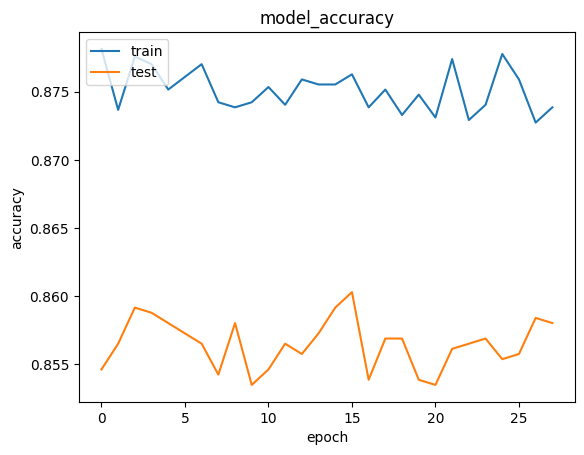

In [45]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [46]:
##part- 3 making the predictions and evaluating the model
#predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [48]:
## make the confuse matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1461,  134],
       [ 180,  225]])

In [49]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.843

In [50]:
##get the weights
classifier.get_weights()

[array([[-1.50392070e-01, -2.61893626e-02, -5.81549257e-02,
         -6.99690580e-01,  4.54299837e-01, -2.65275091e-01,
          2.64273793e-01,  1.69653356e-01, -1.05817974e-01,
         -2.07097352e-01,  1.49519127e-02],
        [ 2.19625854e+00,  5.31321526e-01,  1.92612186e-01,
         -6.35473907e-01,  5.58018208e-01, -3.28591824e-01,
          6.93117321e-01, -4.15682584e-01, -5.68468809e-01,
          1.01351881e+00, -6.99949443e-01],
        [-3.49516839e-01,  1.86231121e-01, -2.32652113e-01,
         -6.53537750e-01,  6.09390140e-01, -4.16505277e-01,
         -8.04453418e-02,  2.49658003e-01, -1.49615631e-01,
         -1.53397799e-01, -8.89449343e-02],
        [ 4.16873425e-01, -6.09795392e-01, -1.60944450e+00,
          2.88780004e-01, -1.57978988e+00, -8.50172937e-01,
         -6.77805510e-04, -6.34297252e-01, -6.86522603e-01,
         -4.49374914e-01,  1.41953766e+00],
        [ 8.66268694e-01, -4.76600707e-01,  1.02262747e+00,
          9.18580592e-01, -1.08063734e+00, -